In [72]:
import pandas as pd

import nltk
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression


# Analise exploratória

In [2]:
data = pd.read_csv('UpdatedResumeDataSet.csv')

In [10]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
data.shape

(962, 2)

In [9]:
len(data['Category'].unique())

25

In [8]:
data.groupby(['Category']).size()

Category
Advocate                     20
Arts                         36
Automation Testing           26
Blockchain                   40
Business Analyst             28
Civil Engineer               24
Data Science                 40
Database                     33
DevOps Engineer              55
DotNet Developer             28
ETL Developer                40
Electrical Engineering       30
HR                           44
Hadoop                       42
Health and fitness           30
Java Developer               84
Mechanical Engineer          40
Network Security Engineer    25
Operations Manager           40
PMO                          30
Python Developer             48
SAP Developer                24
Sales                        40
Testing                      70
Web Designing                45
dtype: int64

# PRODUTO 1 - Ler um currículo e descobrir a categoria dele.

## Tratamento dos dados

Limpar stop words

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_mystopwords(sentence):
    tokens = sentence.split(" ")
    word_tokens = word_tokenize(sentence)
    tokens_filtered = [w for w in word_tokens if not w.lower() in stop_words and not w.isdigit()] 
    return (" ").join(tokens_filtered)

def etl(sentence):
  sentence = sentence.lower()
  sentence = re.sub('[^0-9a-z]+', ' ', sentence)
  sentence = remove_mystopwords(sentence)
  return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
data["Resume_clean"] = data["Resume"].apply(etl)

 De texto para Vector

In [52]:
import spacy

nlp = spacy.load("en_core_web_sm")

def textToVec(sentence):
  model= nlp(sentence)
  return model.vector


In [105]:
#data["textToVec"] = data["Resume_clean"].apply(textToVec)
data["textToVec"] = data["Resume"].apply(textToVec)

In [61]:
data

,Category,Resume,Resume_Filtered,textToVec
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,"[0.070587955, -0.49643338, -1.684736, 1.082318..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...,"[-0.21238793, -0.4277574, -1.6194674, 0.931479..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,"[-0.30027613, -0.75585526, -1.5050914, 0.78869..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,"[0.110562146, -0.414623, -1.6905171, 0.9038174..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,"[-1.0504205, -0.3307573, -1.6437876, 0.4136960..."
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient ms office word basi...,"[-0.15241556, -0.25580707, -1.2935445, 1.30190..."
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenges positive thinkin...,"[-0.43944427, -0.56226444, -1.6951654, 0.65318..."
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...,"[-0.31872657, -0.37274155, -1.5156728, 1.14622..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...,"[0.44328243, -0.85399354, -1.8293434, 1.190753..."


In [106]:
le = preprocessing.LabelEncoder()
le.fit(data.Category)
data['categorical_label'] = le.transform(data.Category)
data

,Category,Resume,Resume_Filtered,textToVec,categorical_label
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,"[0.14556324, 0.24599661, -0.7094913, 0.3701717...",6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...,"[0.15839972, 0.26881614, -0.8938922, 0.3446695...",6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,"[0.52939194, -0.023848578, -0.89841825, 0.1505...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,"[0.37338647, 0.29880118, -1.0102783, 0.3094666...",6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,"[0.21641016, 0.41204798, -1.1446353, -0.069025...",6
...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient ms office word basi...,"[0.00026824282, 0.23031802, -0.72566265, 0.307...",23
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenges positive thinkin...,"[-0.16741481, 0.11520532, -1.0212095, 0.049713...",23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...,"[0.46961161, 0.001306963, -0.9898592, 0.572177...",23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...,"[1.0884554, -0.4547324, -1.3747607, 1.0721132,...",23


## Modelagem: classificacao

In [126]:
train = data.sample(frac = 0.8, replace=False, random_state = 25)
test = data.drop(train.index)

In [70]:
train.head()

,Category,Resume,Resume_Filtered,textToVec,categorical_label
761,Hadoop,"Technical Skills Programming Languages: C, C++...",technical skills programming languages c c jav...,"[0.23720254, -0.9316864, -1.7295979, 0.86681, ...",13
385,Java Developer,Education Details \r\nJanuary 2016 B.E Informa...,education details january b e information tech...,"[-0.045506004, -0.7783604, -1.8716857, 1.07166...",15
424,Business Analyst,IT Skills: Area Exposure Modeling Tool: Bizagi...,skills area exposure modeling tool bizagi ms v...,"[0.106429316, -0.122079015, -1.606254, 0.89211...",4
400,Java Developer,TECHNICAL SKILLS Programming Languages: Java (...,technical skills programming languages java se...,"[-0.066855565, -0.6750004, -1.5637364, 0.84780...",15
183,Web Designing,Education Details \r\nJanuary 2016 B.Sc. Infor...,education details january b sc information tec...,"[0.24481331, -0.6137151, -1.7022486, 1.3779435...",24


In [127]:
X_train = np.array(train['textToVec'].tolist())
y_train = np.array(train['categorical_label'].tolist())

X_test = np.array(test['textToVec'].tolist())
y_test = np.array(test['categorical_label'].tolist())

In [128]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Avalicao do modelo

In [129]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [130]:
accuracy = np.trace(cm) / np.sum(cm).astype('float')
misclass = 1 - accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


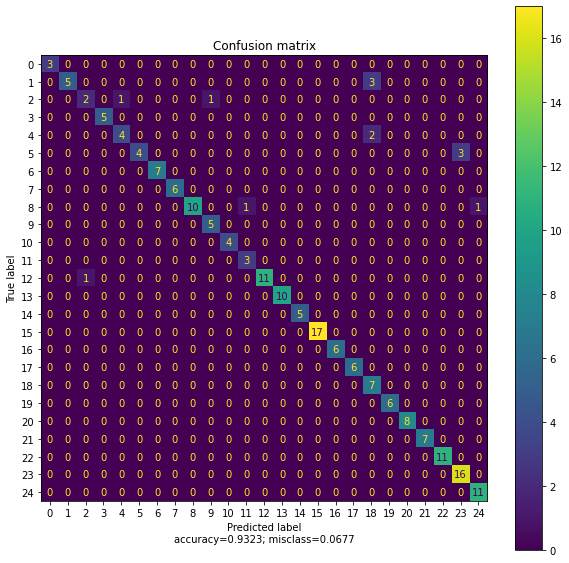

In [131]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

_ , ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.title('Confusion matrix')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()


In [132]:
test['predict'] = y_pred

In [134]:
test[(test['predict'] == 18)]

,Category,Resume,Resume_Filtered,textToVec,categorical_label,predict
106,Arts,"Additional qualifications April 2000, Web Desi...",additional qualifications april web designing ...,"[0.15229471, 0.23679154, -0.45454472, 0.086571...",1,18
130,Arts,"Additional qualifications April 2000, Web Desi...",additional qualifications april web designing ...,"[0.15229471, 0.23679154, -0.45454472, 0.086571...",1,18
136,Arts,"Additional qualifications April 2000, Web Desi...",additional qualifications april web designing ...,"[0.15229471, 0.23679154, -0.45454472, 0.086571...",1,18
406,Business Analyst,IT Skills: Area Exposure Modeling Tool: Bizagi...,skills area exposure modeling tool bizagi ms v...,"[0.19267488, 0.4949002, -0.59189236, 0.0302194...",4,18
414,Business Analyst,IT Skills: Area Exposure Modeling Tool: Bizagi...,skills area exposure modeling tool bizagi ms v...,"[0.19267488, 0.4949002, -0.59189236, 0.0302194...",4,18
514,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,education details august b e electronics pune ...,"[0.45822054, 0.18510844, -0.65149474, 0.485387...",18,18
517,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...,skills well versed ms office internet applicat...,"[0.36725405, 0.4732157, -0.4564261, 0.17541513...",18,18
526,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,education details august b e electronics pune ...,"[0.45822054, 0.18510844, -0.65149474, 0.485387...",18,18
529,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...,skills well versed ms office internet applicat...,"[0.36725405, 0.4732157, -0.4564261, 0.17541513...",18,18
534,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,education details august b e electronics pune ...,"[0.45822054, 0.18510844, -0.65149474, 0.485387...",18,18


## Produto final